<a href="https://colab.research.google.com/github/kaylay18/Biochar-Yield-Prediction/blob/main/Yi_Kayla_CHEG472_FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [2]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.9 MB/s eta 0:00:00


In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Added import for DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import shap
from skopt import BayesSearchCV, gp_minimize
from skopt.space import Real, Integer
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.linear_model import LinearRegression

In [6]:
# Load the dataset
file_name = 'Dataset 1.xlsx' # Replace with dataset
df = pd.read_excel(file_name)
df.head()

,Type of Feedstock,Fixed carbon,Volatile matter,Ash,C,H,O,N,Residence time (min),Temperature (°C),Heating rate (°C/min),Biochar yield (%),Fixed Carbon,Volatile matter.1,Ash.1,C.1,H.1,O.1,N.1
0,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,400,15,30.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,400,10,26.60,73.237998,21.246170,5.515832,79.65,3.96,15.72,0.67
2,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,90,400,5,26.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,500,15,23.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,500,10,25.32,82.926829,8.739837,8.333333,83.27,3.33,12.62,0.78


In [7]:
# Summary Statistics
df.describe()

,Fixed carbon,Volatile matter,Ash,C,H,O,N,Residence time (min),Temperature (°C),Heating rate (°C/min),Biochar yield (%),Fixed Carbon,Volatile matter.1,Ash.1,C.1,H.1,O.1,N.1
count,226.000000,226.000000,226.000000,226.000000,226.00000,210.000000,226.000000,226.000000,226.000000,226.000000,226.000000,159.000000,159.000000,159.000000,162.000000,150.000000,150.000000,162.000000
mean,13.842965,79.828759,6.328276,44.189115,5.93646,42.443143,1.297345,38.084071,460.663717,11.371681,39.533274,53.572797,32.375710,14.051493,64.565247,3.689067,17.388133,1.482994
std,5.360883,4.911013,3.942017,5.437395,0.99575,5.198699,1.656366,18.763724,124.821658,5.686154,15.099434,19.768014,20.003367,9.019209,12.074876,1.500346,10.272787,1.380188
min,4.329004,68.200000,0.160000,35.700000,4.10000,27.610000,0.000000,1.000000,200.000000,5.000000,17.680000,15.040000,0.487755,0.320000,44.120000,1.260000,0.000000,0.000000
25%,10.060000,76.860000,2.834310,40.815000,5.50000,40.230000,0.490000,30.000000,350.000000,5.000000,30.150000,42.335000,17.982770,6.558736,55.175000,2.482500,10.012500,0.802500
50%,12.804143,80.850000,6.605415,43.570000,5.81000,42.000000,0.990000,30.000000,450.000000,10.000000,35.200000,54.160000,25.780000,14.200000,62.255000,3.590000,14.380000,1.120000
75%,17.140000,82.748599,8.695000,47.660000,6.21000,44.900000,1.350000,60.000000,550.000000,15.000000,42.820000,64.880000,44.386066,19.830000,70.615000,4.730000,23.732500,1.622500
max,27.800000,91.160000,15.141514,64.230000,10.18000,53.100000,9.610000,90.000000,800.000000,25.000000,95.890000,94.106290,82.720000,37.910000,94.610000,8.720000,45.170000,9.050000


In [8]:
# Check for missing data
missing_data = df.isnull().sum()

# Print the results
print(missing_data)

Type of Feedstock         0
Fixed carbon              0
Volatile matter           0
Ash                       0
C                         0
H                         0
O                        16
N                         0
Residence time (min)      0
Temperature (°C)          0
Heating rate (°C/min)     0
Biochar yield (%)         0
Fixed Carbon             67
Volatile matter.1        67
Ash.1                    67
C.1                      64
H.1                      76
O.1                      76
N.1                      64
dtype: int64


In [9]:
# Fill missing values with the mean of each column
for column in df.columns:
    if df[column].isnull().any():  # Check if column has missing values
        mean_value = df[column].mean()  # Calculate mean of the column
        df[column].fillna(mean_value, inplace=True)  # Fill missing values with the mean

# Verify if there are any missing values left
print(df.isnull().sum())

Type of Feedstock        0
Fixed carbon             0
Volatile matter          0
Ash                      0
C                        0
H                        0
O                        0
N                        0
Residence time (min)     0
Temperature (°C)         0
Heating rate (°C/min)    0
Biochar yield (%)        0
Fixed Carbon             0
Volatile matter.1        0
Ash.1                    0
C.1                      0
H.1                      0
O.1                      0
N.1                      0
dtype: int64


<ipython-input-9-fde15dac4ab8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Fill missing values with the mean


In [10]:
# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)


Numeric columns: ['Fixed carbon', 'Volatile matter', 'Ash', 'C', 'H', 'O', 'N', 'Residence time (min)', 'Temperature (°C)', 'Heating rate (°C/min)', 'Biochar yield (%)', 'Fixed Carbon', 'Volatile matter.1', 'Ash.1', 'C.1', 'H.1', 'O.1', 'N.1']

Categorical columns: ['Type of Feedstock']


In [11]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Fixed carbon,Volatile matter,Ash,C,H,O,N,Residence time (min),Temperature (°C),Heating rate (°C/min),...,Type of Feedstock_Rape stalk,Type of Feedstock_Rapeseed oil cake,Type of Feedstock_Rice Straw,Type of Feedstock_Rice husk,Type of Feedstock_Straw pallet,Type of Feedstock_Vine pruning,Type of Feedstock_Wheat straw,Type of Feedstock_Wood bark,Type of Feedstock_Wood stem,Type of Feedstock_hinoki cypress
0,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,400,15,...,False,False,False,False,False,False,False,False,False,False
1,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,400,10,...,False,False,False,False,False,False,False,False,False,False
2,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,90,400,5,...,False,False,False,False,False,False,False,False,False,False
3,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,500,15,...,False,False,False,False,False,False,False,False,False,False
4,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,500,10,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Calculate the IQR for each column
# Select numeric columns explicitly to avoid issues with boolean columns
numeric_columns = df_encoded.select_dtypes(include=['number']).columns
Q1 = df_encoded[numeric_columns].quantile(0.25)
Q3 = df_encoded[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for numeric columns only
numeric_df = df_encoded[numeric_columns] # Select only numeric columns
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Filter outliers based on numeric columns
df_cleaned = df_encoded[~outliers.any(axis=1)]
df_cleaned.describe()

,Fixed carbon,Volatile matter,Ash,C,H,O,N,Residence time (min),Temperature (°C),Heating rate (°C/min),Biochar yield (%),Fixed Carbon,Volatile matter.1,Ash.1,C.1,H.1,O.1,N.1
count,82.000000,82.000000,82.000000,82.000000,82.0000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,11.481575,81.314903,7.203522,43.325488,5.8300,42.665491,0.941463,46.341463,453.658537,11.646341,35.336707,53.026902,31.637723,15.335375,63.693569,3.465265,16.097237,1.226620
std,4.220175,4.353274,3.987705,3.237291,0.3458,2.620382,0.558148,20.154477,92.222385,5.214822,6.964748,7.438354,6.694940,4.978437,5.328101,0.680929,4.195284,0.402251
min,6.540000,70.900000,0.160000,36.070000,5.2000,39.320000,0.000000,10.000000,300.000000,5.000000,21.700000,30.910000,12.100000,0.320000,49.320000,1.780000,4.760000,0.190000
25%,9.930000,78.708947,3.538194,41.920000,5.6400,41.120000,0.525000,30.000000,400.000000,10.000000,32.197500,53.572797,30.465000,14.051493,61.837500,3.250000,14.075000,0.912500
50%,10.170000,82.380000,7.390000,43.920000,5.8100,42.443143,0.895000,30.000000,450.000000,10.000000,35.000000,53.572797,32.375710,14.051493,64.565247,3.689067,17.388133,1.435000
75%,11.441144,82.989012,8.860000,43.950000,5.9200,43.365000,1.120000,60.000000,537.500000,15.000000,38.312500,54.452500,32.375710,17.127500,65.070000,3.689067,17.388133,1.482994
max,24.800000,91.160000,15.141514,51.880000,6.4800,51.070000,1.960000,90.000000,600.000000,20.000000,56.340000,76.400000,49.980000,28.360000,77.850000,5.290000,24.200000,2.290000


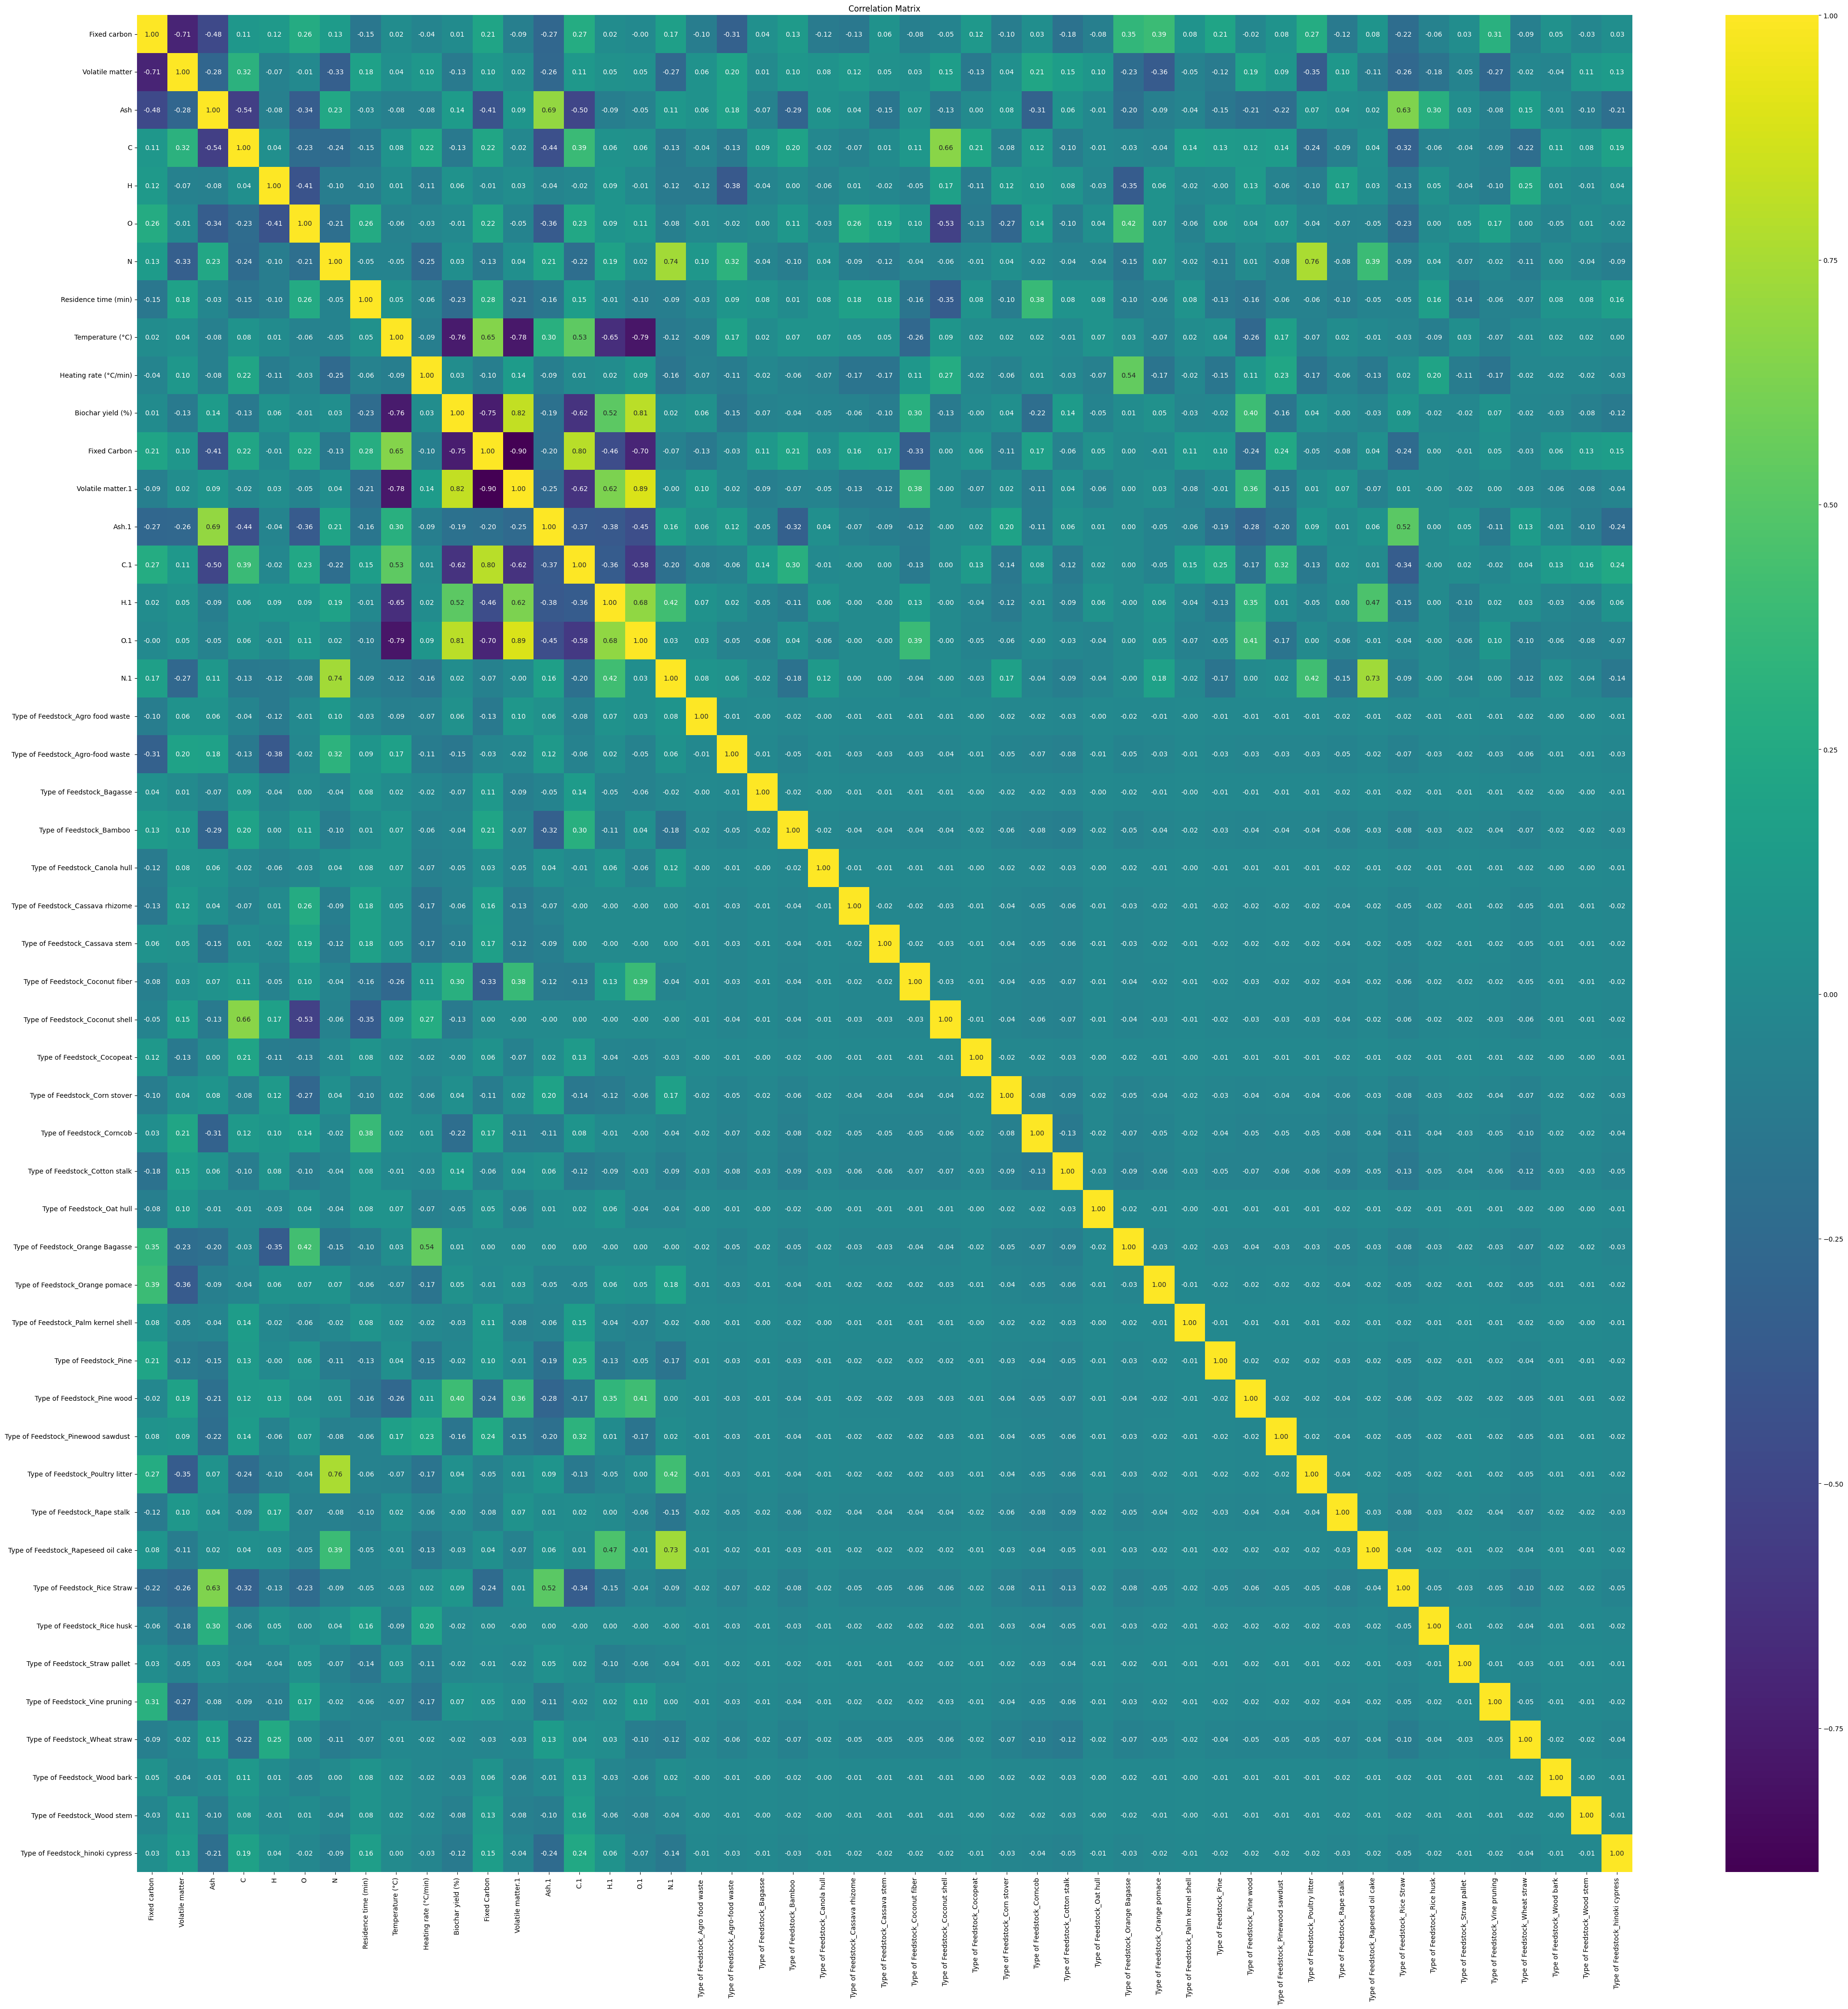

In [19]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Splitting the dataset into training and test sets
columns_to_drop = [col for col in df_cleaned.columns if 'Biochar yield (%)' in col] # Replace with your target
X = df_cleaned.drop(columns=columns_to_drop, axis=1)
y = df_cleaned['Biochar yield (%)']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Machine Learning Models
models = {
    "Random Forest": RandomForestRegressor(random_state=42), # Changed to Regressor
    "Logistic Regression": LinearRegression(), # Changed to Linear Regression for Regression Problem
    "Decision Tree": DecisionTreeRegressor(random_state=42), # Changed to Regressor
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Training and evaluating the models
best_model = None
best_rmse = float('inf')

for model_name, model in models.items():
    print(f"Training {model_name}...")

    if model_name in ["KNN"]:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for training set
    rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate evaluation metrics for test set
    rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)


    # Print the metrics for the current model
    print(f"{model_name} Metrics:")
    print(f"  Training Set:")
    print(f"    RMSE: {rmse_train:.4f}")
    print(f"    MAE: {mae_train:.4f}")
    print(f"    R^2: {r2_train:.4f}")
    print(f"  Test Set:")
    print(f"    RMSE: {rmse_test:.4f}")
    print(f"    MAE: {mae_test:.4f}")
    print(f"    R^2: {r2_test:.4f}")

    # Save the best model based on RMSE for the test dataset
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_model = model
        best_model_name = model_name

    print(f"{model_name} RMSE on Test Data: {rmse_test}")

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model: {best_model_name} with RMSE: {best_rmse}")

Training Random Forest...
Random Forest Metrics:
  Training Set:
    RMSE: 1.4588
    MAE: 0.9689
    R^2: 0.9511
  Test Set:
    RMSE: 3.9106
    MAE: 3.0727
    R^2: 0.7607
Random Forest RMSE on Test Data: 3.910564253704703
Training Logistic Regression...
Logistic Regression Metrics:
  Training Set:
    RMSE: 2.0375
    MAE: 1.5586
    R^2: 0.9046
  Test Set:
    RMSE: 2.9505
    MAE: 2.4482
    R^2: 0.8638
Logistic Regression RMSE on Test Data: 2.9505272900410198
Training Decision Tree...
Decision Tree Metrics:
  Training Set:
    RMSE: 0.0000
    MAE: 0.0000
    R^2: 1.0000
  Test Set:
    RMSE: 4.0486
    MAE: 3.1524
    R^2: 0.7435
Decision Tree RMSE on Test Data: 4.048619953689375
Training KNN...
KNN Metrics:
  Training Set:
    RMSE: 3.4739
    MAE: 2.4958
    R^2: 0.7227
  Test Set:
    RMSE: 5.1126
    MAE: 4.2045
    R^2: 0.5909
KNN RMSE on Test Data: 5.11255083104315
Best model: Logistic Regression with RMSE: 2.9505272900410198


  0%|          | 0/65 [00:00<?, ?it/s]

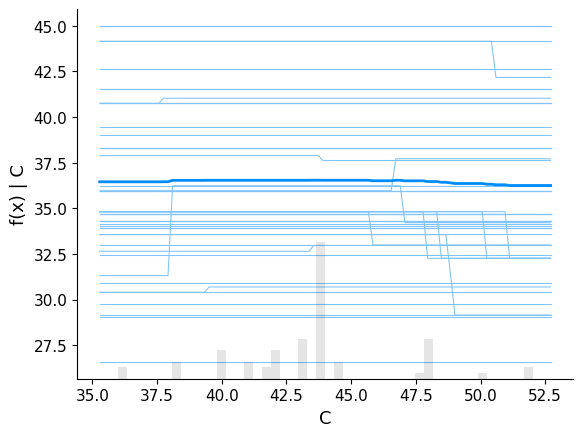

In [46]:
# Partial Dependence Plot
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.KernelExplainer(knn_model.predict, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Plot the PDP
shap.partial_dependence_plot(
    "C", knn_model.predict, X_train # Analyze how each input feature varies with the output
)

In [ ]:
# Title of the app
st.title("Biochar Yield Predictio App")

variable_1 = st.number_input("Fixed Carbon:", value=0)
variable_2 = st.number_input("Volatile matter:", value=0)
variable_3 = st.number_input("Ash:", value=0)
variable_4 = st.number_input("C:", value=0)
variable_5 = st.number_input("H:", value=0)
variable_6 = st.number_input("O:", value=0)
variable_7 = st.number_input("N:", value=0)
variable_8 = st.number_input("Residence time (min):", value=0)
variable_9 = st.number_input("Temperature (°C):", value=0)
variable_10 = st.number_input("Heating rate (°C/min)", value=0)

# Encoding the inputs
input_data = pd.DataFrame({
    'Fixed Carbon': [variable_1],
    'Volatile matter': [variable_2],
    'Ash': [variable_3],
    'C': [variable_4],
    'H': [variable_5],
    'O': [variable_6],
    'N': [variable_7],
    'Residence time (min)': [variable_8],
    'Temperature (°C)': [variable_9],
    'Residence time (min)': [variable_10]

})

# One-hot encode the input data
input_encoded = pd.get_dummies(input_data)

# Align columns with the training data
required_columns = model.feature_names_in_
for col in required_columns:
    if col not in input_encoded.columns:
        input_encoded[col] = 0
input_encoded = input_encoded[required_columns]

# Make the prediction
prediction = model.predict(input_encoded)[0]

# Display the prediction
st.subheader(f"The model's prediction is: {prediction}")